In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate  #for tablular format

import warnings
warnings.filterwarnings("ignore")

#For Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

# FUNCTIONS

### ***Data checking***

In [2]:
def datacheck(data):

    print(f"Rows: {data.shape[0]}\tColumns: {data.shape[1]}")
    table_data = []

    for i in data.columns:
      table_data.append([i, len(data[i].unique()), data[i].isna().sum(), data[i].dtypes])
    print(tabulate(table_data, headers=["Column", "Total Unique Values", "Missing Values","Data Type"], tablefmt="fancy_grid"))

### *HISTOGRAM*

In [3]:
def histogramvisual(a,alabel):

  sns.histplot(a,  kde=True, color='blue')

  plt.title(f"{alabel} Distibution")
  plt.xlabel(alabel)
  plt.ylabel("Total cars")
  plt.tick_params(axis='x', labelsize=8, rotation=85)

  plt.tight_layout()
  plt.show()
  return

### *Count Bar*

In [4]:
def countvisual(a,b,alabel,blabel):

    custom_palette = sns.color_palette("pastel")
    ax = sns.countplot(x=a, hue=b, palette=custom_palette, alpha=0.5,  edgecolor='black', linewidth=0.5)

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points', fontsize=7)

    plt.title(f"{alabel} vs {blabel}")
    plt.xlabel(alabel)
    plt.ylabel(blabel)
    plt.tick_params(axis='x', labelsize=8, rotation=85)

    plt.tight_layout()
    plt.show()
    return

### *Bar Graph*

In [5]:
def barvisual(a,b,alabel,blabel):

  custom_palette = sns.color_palette("plasma")

  ax = sns.barplot(x=a, y=b, palette=custom_palette, alpha=0.5,  edgecolor='black', linewidth=0.5)

  # Showing values
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points', fontsize=7)

  plt.title(f"{alabel} vs {blabel}")
  plt.xlabel(alabel)
  plt.ylabel(blabel)
  plt.tick_params(axis='x', labelsize=8, rotation=85)
  plt.tight_layout()
  plt.show()

  return

### ScatterPlot

In [6]:
def pairplt(a,b,data):

  plt.figure(figsize=(15,10)) 
  sns.pairplot(data, x_vars=a, y_vars=b, height=3)
  plt.show()
    
  return

### Correlation

In [26]:
def Correlaton(x):
  plt.subplots(figsize=(14, 12))
  dfa=x

  sns.heatmap(dfa.corr(), annot=True)
  plt.show()

  return

### MODELS

In [31]:
def mod(model,x_train_std, x_test_std, y_train, y_test):

    print(f"Train accuracy: {model.score(x_train_std, y_train)} \nTest accuracy: {model.score(x_test_std, y_test)}\n")

    y_pred = model.predict(x_test_std)

    mse = mean_squared_error(y_test, y_pred)  #Mean Square Error
    rmse = np.sqrt(mse)                           #RMSE
    mae = mean_absolute_error(y_test, y_pred) #Mean Absolute Error
    r_squared = r2_score(y_test, y_pred)      #R Square

    return print(f"Mean Squared Error (MSE): {mse} \nMean Absolute Error (MAE): {mae} \nR-squared (R²): {r_squared} \n")

# DATASET

In [7]:
df = pd.read_csv("C:/Users/palla/Downloads/Python/Data_science/CarPrice_Assignment.csv")

In [8]:
datacheck(df)

Rows: 205	Columns: 26
╒══════════════════╤═══════════════════════╤══════════════════╤═════════════╕
│ Column           │   Total Unique Values │   Missing Values │ Data Type   │
╞══════════════════╪═══════════════════════╪══════════════════╪═════════════╡
│ car_ID           │                   205 │                0 │ int64       │
├──────────────────┼───────────────────────┼──────────────────┼─────────────┤
│ symboling        │                     6 │                0 │ int64       │
├──────────────────┼───────────────────────┼──────────────────┼─────────────┤
│ CarName          │                   142 │                0 │ object      │
├──────────────────┼───────────────────────┼──────────────────┼─────────────┤
│ fueltype         │                     2 │                0 │ object      │
├──────────────────┼───────────────────────┼──────────────────┼─────────────┤
│ aspiration       │                     2 │                0 │ object      │
├──────────────────┼──────────────────────

In [9]:
df['CarName'].str.lower().unique()
#Checking the unique ones
df['Company']=df['CarName'].apply(lambda x: x.split(' ')[0])
#Creating a new column for company names

In [10]:
#Average Car Price for each company
z = df.groupby('Company')['price'].mean().reset_index().sort_values(by='Company', ascending=False)
#Average Car Prices for both the fuel type
y= df.groupby('fueltype')['price'].mean().reset_index().sort_values(by='fueltype', ascending=False)

# *GRAPHS*

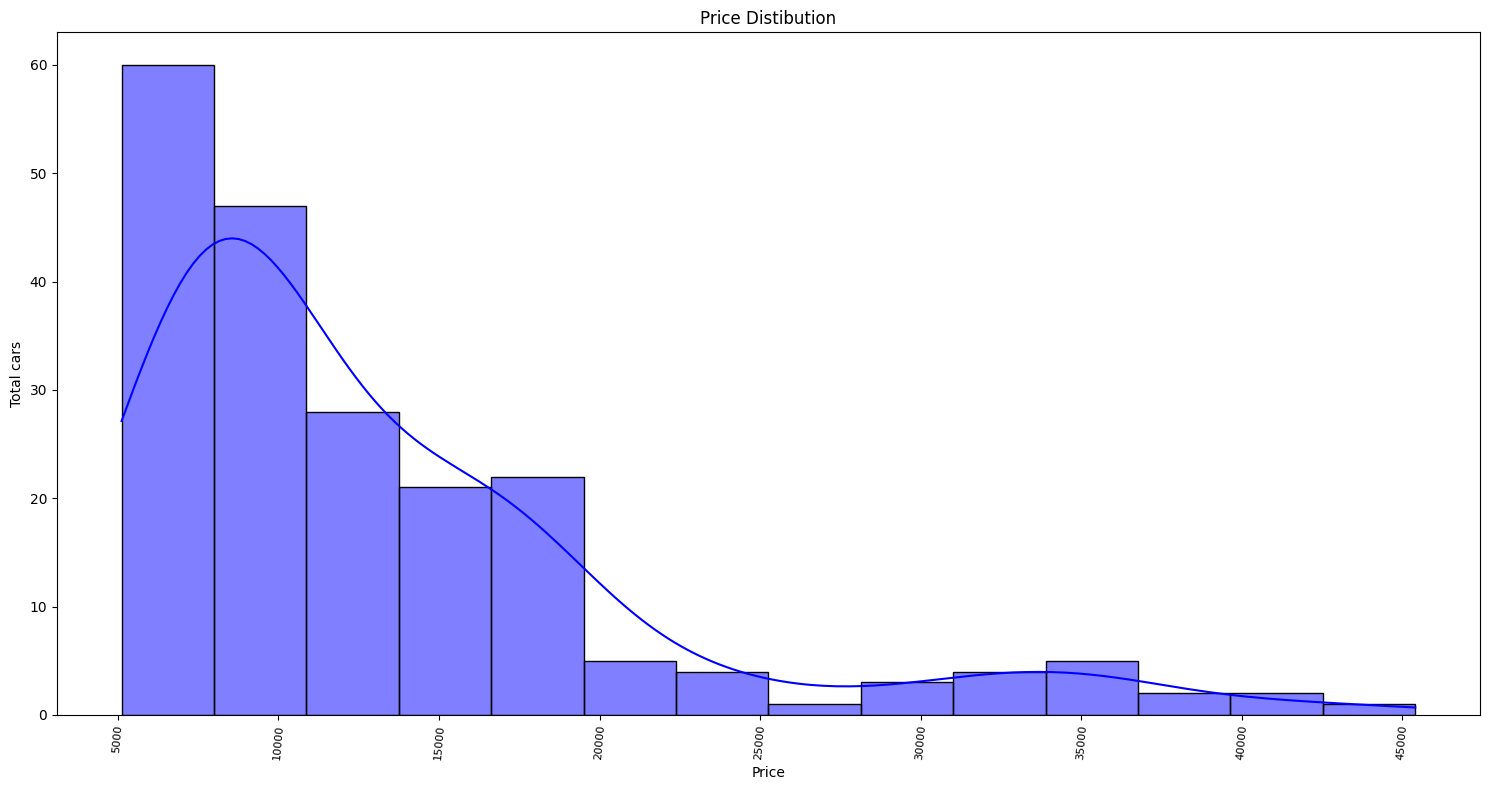

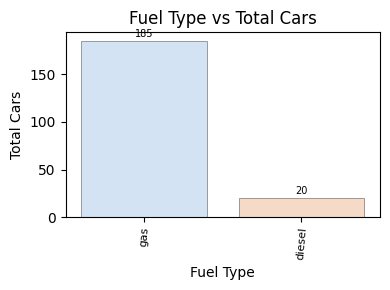

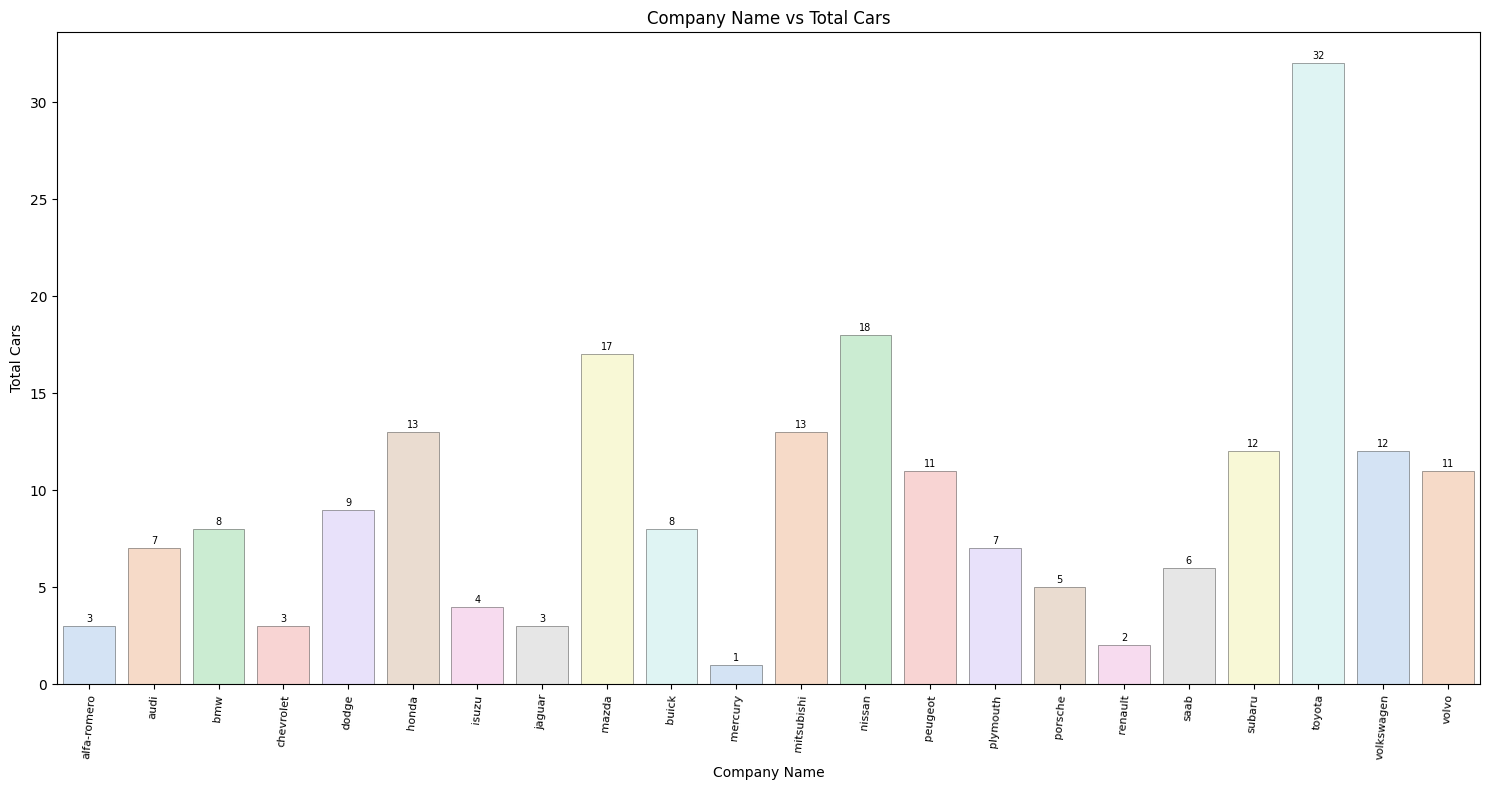

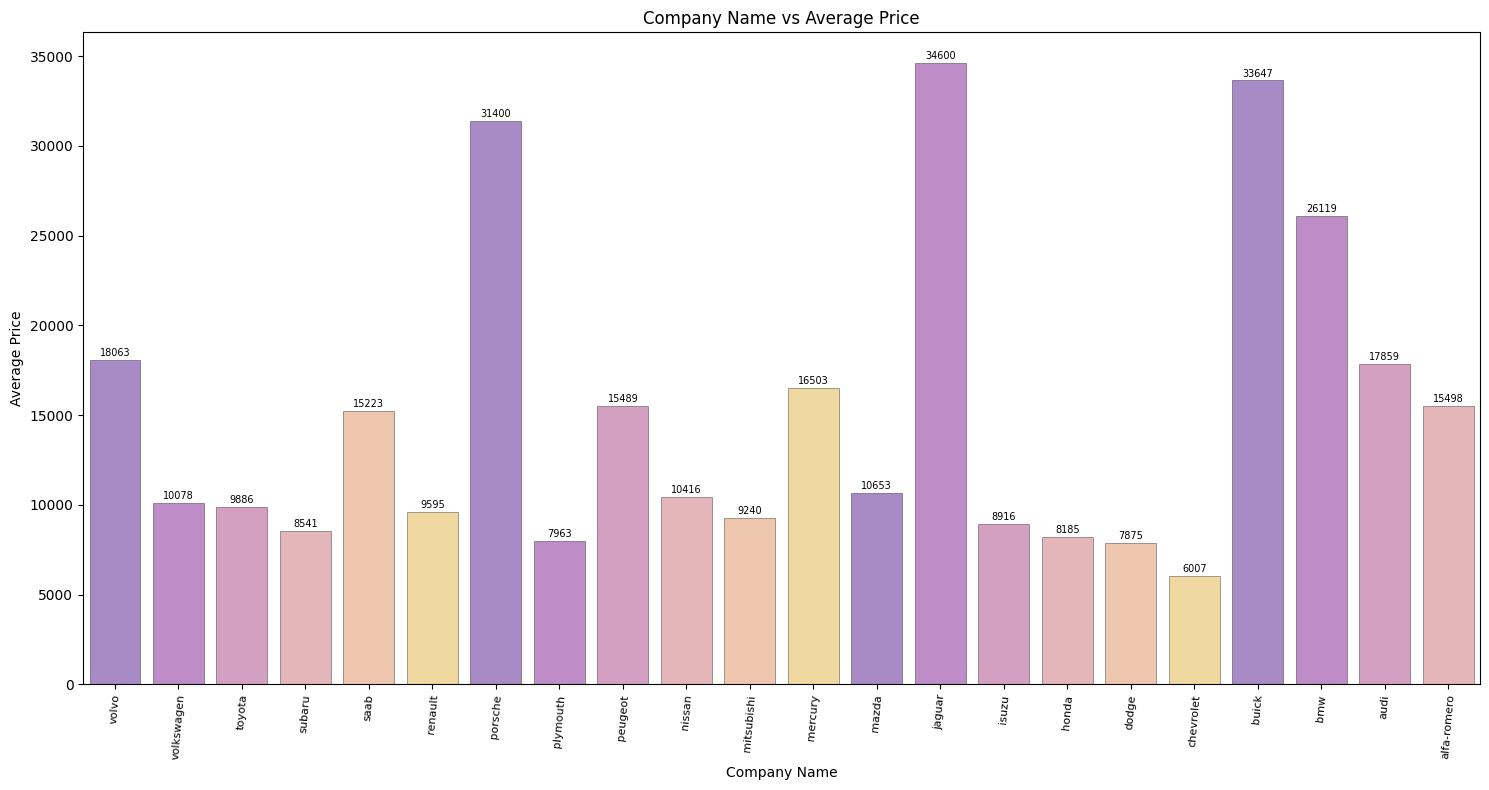

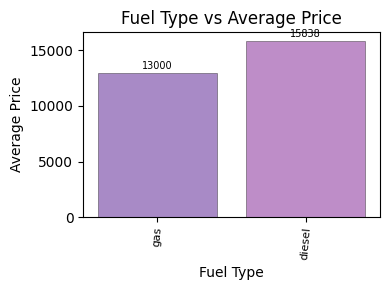

In [11]:
plt.figure(figsize=(15,8))

histogramvisual(df['price'],"Price")

plt.figure(figsize=(4,3))
countvisual(df['fueltype'],df['fueltype'],"Fuel Type","Total Cars")

plt.figure(figsize=(15,8))
countvisual(df['Company'],df['Company'],"Company Name","Total Cars")

plt.figure(figsize=(15,8))
barvisual(z['Company'],z['price'],"Company Name","Average Price")

plt.figure(figsize=(4,3))
barvisual(y['fueltype'],y['price'],"Fuel Type","Average Price")

Also taking into consideration the Car length, width, height and weight and how it correlated to the prices. After that we're looking into the other parameteres

<Figure size 1500x1000 with 0 Axes>

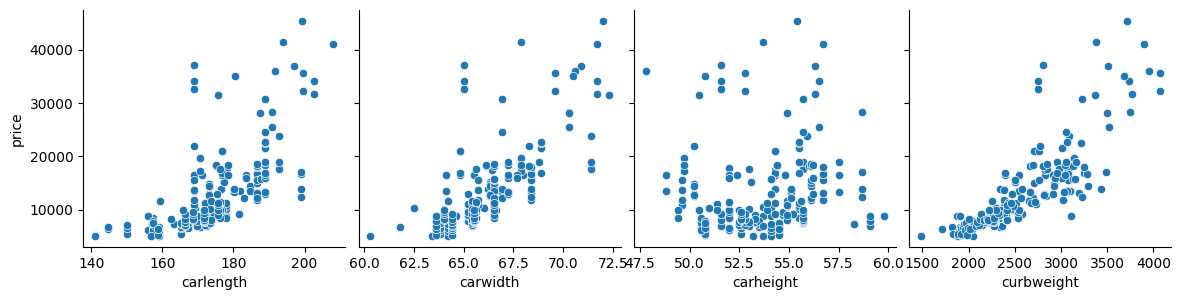

<Figure size 1500x1000 with 0 Axes>

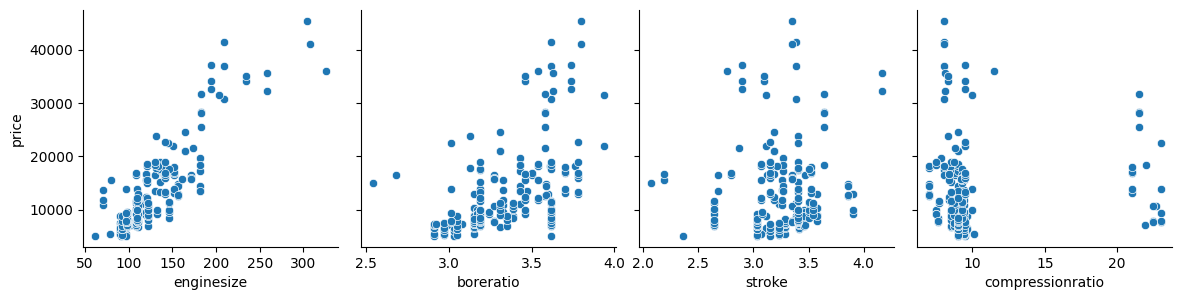

<Figure size 1500x1000 with 0 Axes>

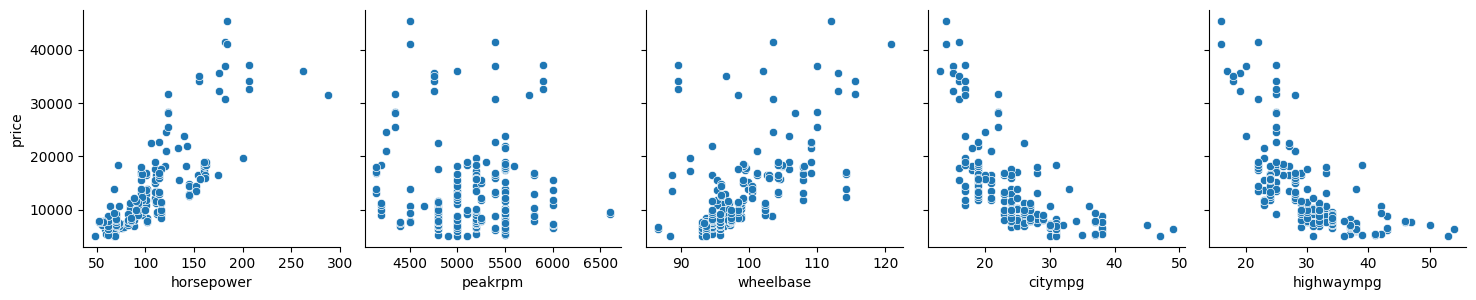

In [12]:
pairplt(['carlength','carwidth','carheight','curbweight'],'price',df)
pairplt(['enginesize','boreratio','stroke','compressionratio'],'price',df)
pairplt(['horsepower', 'peakrpm','wheelbase', 'citympg', 'highwaympg'],'price',df)

# PreProcessing

In [23]:
new_df = df[['fueltype','carlength', 'carwidth', 'carheight', 'curbweight','enginesize','stroke',
             'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg','price']]
new_df = pd.get_dummies(new_df, columns=['fueltype']).astype(int)
#newdf = newdf.drop(['fueltype_diesel'], axis=1)  #Since we have gas type too

new_df.head()

,carlength,carwidth,carheight,curbweight,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_diesel,fueltype_gas
0,168,64,48,2548,130,2,9,111,5000,21,27,13495,0,1
1,168,64,48,2548,130,2,9,111,5000,21,27,16500,0,1
2,171,65,52,2823,152,3,9,154,5000,19,26,16500,0,1
3,176,66,54,2337,109,3,10,102,5500,24,30,13950,0,1
4,176,66,54,2824,136,3,8,115,5500,18,22,17450,0,1


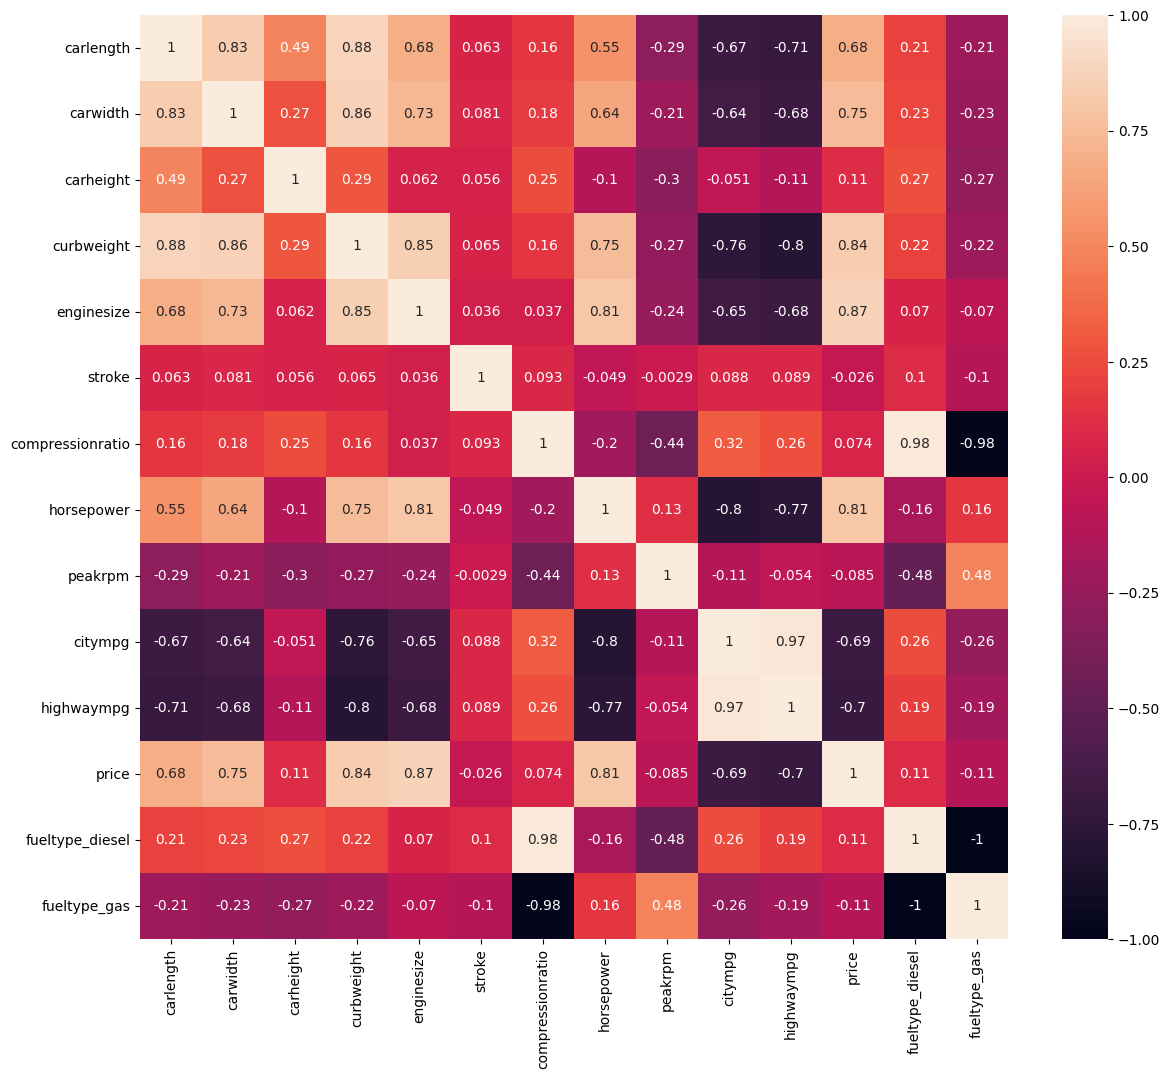

In [29]:
Correlaton(new_df)

Price has a good correlation with engine size, curb weight, horsepower and car width

80:20 Training : Test

In [95]:
#X = new_df[['fueltype_diesel','fueltype_gas','carlength', 'carwidth', 'carheight', 'curbweight','enginesize','stroke','compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]
X = new_df[['fueltype_diesel','carwidth', 'carheight', 'curbweight','enginesize','horsepower']]
y = new_df['price']

x_train, x_test, y_train, y_test = train_test_split(X,y, shuffle=True, test_size=0.2, random_state=99)


STANDARD SCALER

In [96]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

# Models

#1

In [97]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

mod(lin_reg,x_train_std, x_test_std, y_train, y_test)

Train accuracy: -41.5748508746603 
Test accuracy: -53.714064130367674

Mean Squared Error (MSE): 2610855987.1551533 
Mean Absolute Error (MAE): 50615.42966592818 
R-squared (R²): -53.714064130367674 

